In [81]:
import os
import numpy as np

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

np.set_printoptions(precision=4)
seg_length = 500

TensorFlow version: 2.13.0


In [82]:
# x = None
# y = None

# for db in ["chf2db", "chfdb"]:
#     for record in os.listdir(f'data/{db}/rr'):
#         rr = np.loadtxt(f'data/{db}/rr/{record}')
#         n_segments = rr.shape[0] // seg_length
#         rr = rr[:n_segments*seg_length].reshape((n_segments, seg_length))
#         labels = np.c_[np.ones(n_segments), np.zeros(n_segments)]

#         if x is None or y is None:
#             x = rr
#             y = labels
#         else:
#             x = np.r_[rr, x]
#             y = np.r_[labels, y]


# for db in ["nsrdb", "nsr2db", "fantasia"]:
#     for record in os.listdir(f'data/{db}/rr'):
#         rr = np.loadtxt(f'data/{db}/rr/{record}')
#         n_segments = rr.shape[0] // seg_length
#         rr = rr[:n_segments*seg_length].reshape((n_segments, seg_length))
#         labels = np.c_[np.zeros(n_segments), np.ones(n_segments)]

#         if x is None or y is None:
#             x = rr
#             y = labels
#         else:
#             x = np.r_[rr, x]
#             y = np.r_[labels, y]

# x.shape, y.shape

X = None
y = None

db1_pos = ['chfdb']
db1_neg = ['nsrdb', 'fantasia']
db2_pos = ['chf2db']
db2_neg = ['nsr2db']

for db in db1_pos:
    for record in os.listdir(f'data/{db}/rr'):
        rr = np.loadtxt(f'data/{db}/rr/{record}')
        n_segments = rr.shape[0] // seg_length
        rr = rr[:n_segments*seg_length].reshape((n_segments, seg_length))
        labels = np.c_[np.ones(n_segments), np.zeros(n_segments)]

        if X is None or y is None:
            X = rr
            y = labels
        else:
            X = np.r_[rr, X]
            y = np.r_[labels, y]

for db in db1_neg:
    for record in os.listdir(f'data/{db}/rr'):
        rr = np.loadtxt(f'data/{db}/rr/{record}')
        n_segments = rr.shape[0] // seg_length
        rr = rr[:n_segments*seg_length].reshape((n_segments, seg_length))
        labels = np.c_[np.zeros(n_segments), np.ones(n_segments)]

        if X is None or y is None:
            X = rr
            y = labels
        else:
            X = np.r_[rr, X]
            y = np.r_[labels, y]

X.shape, y.shape

((7397, 500), (7397, 2))

In [83]:
# from sklearn.model_selection import train_test_split
# from sklearn import preprocessing


# x = preprocessing.scale(x, axis=1)
# # scaler = preprocessing.StandardScaler().fit_transform(x)

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=410)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=410)

# X_train.shape, X_valid.shape, X_test.shape



from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = preprocessing.scale(X, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=410)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=410)

X_train.shape, X_valid.shape, X_test.shape

((5991, 500), (666, 500), (740, 500))

In [84]:
# np.unique(y_train[:,0], return_counts=True)

In [85]:
# inputs = tf.keras.layers.Input(shape=(500, 1))

# def inception_lstm(inputs):
#     a = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5, return_sequences=True))(inputs)
#     a = tf.keras.layers.LSTM(5, return_sequences=True)(a)

#     b = tf.keras.layers.Conv1D(5, kernel_size=1)(inputs)
#     b = tf.keras.layers.Conv1D(5, kernel_size=3)(b)

#     c = tf.keras.layers.Conv1D(5, kernel_size=1)(inputs)
#     c = tf.keras.layers.Conv1D(5, kernel_size=5)(c)

#     d = tf.keras.layers.MaxPool1D(3)(inputs)
#     d = tf.keras.layers.Conv1D(5, kernel_size=1)(d)

#     concat = tf.keras.layers.Concatenate(1)([a, b, c, d])
#     return concat

# layer1 = inception_lstm(inputs)
# layer2 = inception_lstm(layer1)
# dropout = tf.keras.layers.Dropout(0.2)(layer2)
# flattened = tf.keras.layers.Flatten()(dropout)
# output = tf.keras.layers.Dense(2, activation='sigmoid')(flattened)

# model = tf.keras.Model(inputs, output)
# model.summary()

In [86]:
# loss_fn = tf.keras.losses.BinaryCrossentropy()
# model.compile(optimizer='adam',
#               loss=loss_fn,
#               metrics=['accuracy'])

In [87]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# model.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid),
#           batch_size=128, epochs=100, callbacks=[callback])

In [88]:
# model.save('model_lstm.keras')
# lstm_model = model

In [89]:
# from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import accuracy_score

# y_pred_lstm = lstm_model.predict(X_test).argmax(axis=1)

In [90]:
# print(recall_score(y_test.argmax(axis=1), y_pred_lstm))
# print(precision_score(y_test.argmax(axis=1), y_pred_lstm))
# print(accuracy_score(y_test.argmax(axis=1), y_pred_lstm))

In [91]:
from tensorflow.keras.models import load_model

lstm_model = load_model("model4 3.keras", compile=False)

In [92]:
lstm_model.summary()

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

y_pred_lstm = lstm_model.predict(X_test).argmax(axis=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500, 1)]             0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 500, 10)              280       ['input_1[0][0]']             
 al)                                                                                              
                                                                                                  
 conv1d (Conv1D)             (None, 500, 5)               10        ['input_1[0][0]']             
                                                                                                  
 conv1d_2 (Conv1D)           (None, 500, 5)               10        ['input_1[0][0]']         

In [93]:
print(recall_score(y_test.argmax(axis=1), y_pred_lstm))
print(precision_score(y_test.argmax(axis=1), y_pred_lstm))
print(accuracy_score(y_test.argmax(axis=1), y_pred_lstm))

0.9156908665105387
0.9376498800959233
0.9162162162162162


Model 2: CNN

In [94]:
from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, \
    concatenate
from sklearn.metrics import f1_score, accuracy_score

def get_model():
    nclass = 2
    inp = tf.keras.layers.Input(shape=(500, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = tf.optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['acc'])
    model.summary()
    return model

model = get_model()
file_path = "baseline_cnn.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

model.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid),
          batch_size=128, epochs=100, callbacks=callbacks_list)

model.load_weights(file_path)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 500, 1)]          0         
                                                                 
 conv1d_40 (Conv1D)          (None, 496, 16)           96        
                                                                 
 conv1d_41 (Conv1D)          (None, 492, 16)           1296      
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 246, 16)           0         
 ng1D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 246, 16)           0         
                                                                 
 conv1d_42 (Conv1D)          (None, 244, 32)           1568      
                                                           

In [95]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

cnn_model = model

pred_test_cnn = cnn_model.predict(X_test)
pred_test_cnn = np.argmax(pred_test_cnn, axis=1)

print(recall_score(y_test.argmax(axis=1), pred_test_cnn ))
print(precision_score(y_test.argmax(axis=1), pred_test_cnn ))
print(accuracy_score(y_test.argmax(axis=1), pred_test_cnn ))

24/24 [==============================] - 0s 6ms/step
0.9391100702576113
0.9593301435406698
0.9418918918918919


In [96]:
import numpy as np 
import matplotlib.pyplot as plt
import stumpy
import pandas as pd
from scipy import signal
from sklearn.linear_model import Ridge
from scipy.spatial import distance
from fatf.utils.kernels import exponential_kernel 

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/Users/rithikbansal/v2.0/listen_to_your_heart/LIMESegment')

from Utils.explanations import LIMESegment, NEVES, LEFTIST, NNSegment, RBP, background_perturb
from  Utils.data import loadUCRDataID
from  Utils.models import *
from  Utils.metrics import *

Actual, CNN, LSTM
[1. 0.] 0 0
4/4 [==============================] - 0s 61ms/step
9


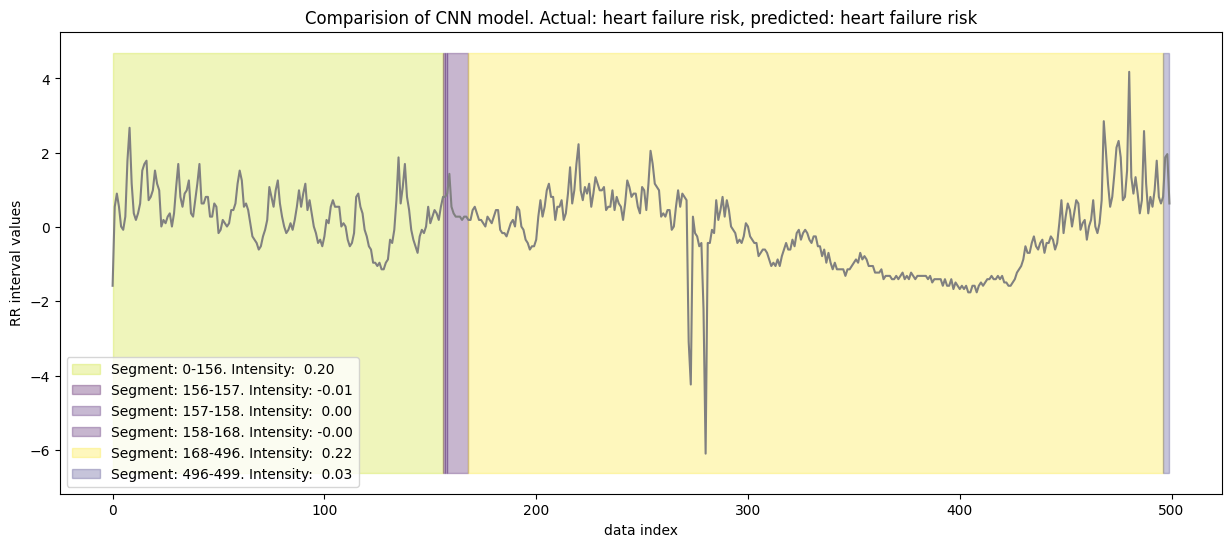

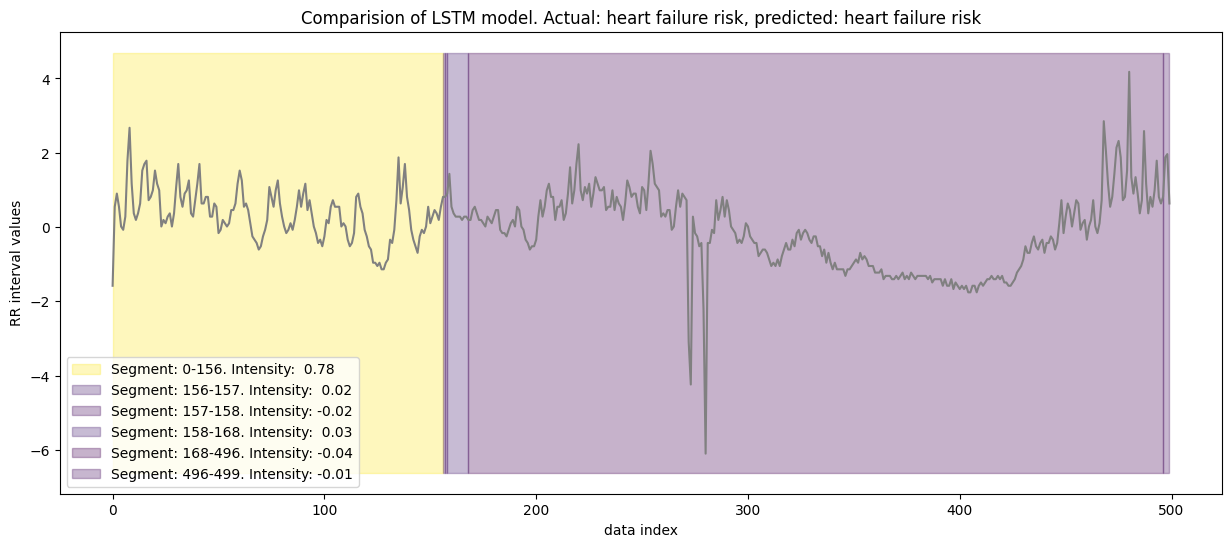

In [145]:
index = 112
print("Actual, CNN, LSTM")
print(y_test[index], pred_test_cnn[index], y_pred_lstm[index])
cnn_exp = LIMESegment(X_test[index], cnn_model, 'class', 'dtw', 100, 3, 5)
lstm_exp = LIMESegment(X_test[index], lstm_model, 'class', 'dtw', 100, 3, 5)
# print("\nCNN")
# print(cnn_exp)
# print("\nLSTM")
# print(lstm_exp)

import random
from matplotlib.collections import LineCollection
from matplotlib.patches import Rectangle

random_test_data_points = {}

for _ in range(10):
    index = random.randint(0, len(y_test))
    cnn_exp = LIMESegment(X_test[index], cnn_model, 'class', 'dtw', 100, 3, 5)
    lstm_exp = LIMESegment(X_test[index], lstm_model, 'class', 'dtw', 100, 3, 5)

    random_test_data_points[index] = [(y_test[index], pred_test_cnn[index], y_pred_lstm[index]), cnn_exp, lstm_exp]

print(len(random_test_data_points))
labels_for_plots = ['healthy heart', 'heart failure risk']

def generate_plots(data_point, ind):
    actual_prediction = data_point[0][0]
    cnn_prediction = data_point[0][1]
    lstm_prediction = data_point[0][2]

    cnn_exp = data_point[1]
    lstm_exp = data_point[2]
    
    all_data = X_test[ind]

    #Plotting CNN data 
    color_intensity = cnn_exp[0][int(cnn_prediction)]
    segment_indices = cnn_exp[1]

    positive_color_intensity = [i for i in color_intensity if i >= 0]
    negative_color_intensity = [i for i in color_intensity if i <= 0]
    min_pos_intensity = min(positive_color_intensity)
    max_pos_intensity = max(positive_color_intensity)
    min_neg_intensity = min(negative_color_intensity)
    max_neg_intensity = max(negative_color_intensity)


    segment_collection = []
    fig, ax = plt.subplots(figsize=(15,6))
    ax.plot(range(len(all_data)), all_data, color='gray', label='RR interval data')

    for i in range(len(color_intensity)):
        start = segment_indices[i]
        end = segment_indices[i+1]
        intensity = color_intensity[i]
        end = end if end >= 0 else len(all_data) - 1

        cmap = plt.get_cmap('viridis')
        color = cmap((intensity - min_neg_intensity)/(max_pos_intensity - min_neg_intensity))

        width = end - start
        # width = min(len(all_data)/len(color_intensity), len(all_data) - start) * 0.8

        segment = Rectangle((start, ax.get_ylim()[0]), width, ax.get_ylim()[1] - ax.get_ylim()[0], alpha=0.3, color=color, label=f'Segment: {start}-{end}. Intensity: {intensity: .2f}')
        segment_collection.append(segment)
        ax.add_patch(segment)

    ax.autoscale()
    ax.set_xlabel('data index')
    ax.set_ylabel('RR interval values')
    ax.set_title(f'Comparision of CNN model. Actual: {labels_for_plots[int(actual_prediction[1])]}, predicted: {labels_for_plots[int(cnn_prediction)]}')

    ax.legend(handles=segment_collection)
    # plt.show()

    fig.savefig(f'CNN_plot_{ind}.png', bbox_inches='tight')


    #plotting LSTM model
    color_intensity = lstm_exp[0][int(lstm_prediction)]
    segment_indices = lstm_exp[1]

    positive_color_intensity = [i for i in color_intensity if i >= 0]
    negative_color_intensity = [i for i in color_intensity if i <= 0]
    min_pos_intensity = min(positive_color_intensity)
    max_pos_intensity = max(positive_color_intensity)
    min_neg_intensity = min(negative_color_intensity)
    max_neg_intensity = max(negative_color_intensity)


    segment_collection = []
    fig, ax = plt.subplots(figsize=(15,6))
    ax.plot(range(len(all_data)), all_data, color='gray', label='RR interval data')

    for i in range(len(color_intensity)):
        start = segment_indices[i]
        end = segment_indices[i+1]
        intensity = color_intensity[i]
        end = end if end >= 0 else len(all_data) - 1

        cmap = plt.get_cmap('viridis')
        color = cmap((intensity - min_neg_intensity)/(max_pos_intensity - min_neg_intensity))
        # cmap = plt.cm.Greys
        # color = cmap(intensity)

        width = end - start
        # width = min(len(all_data)/len(color_intensity), len(all_data) - start) * 0.8

        segment = Rectangle((start, ax.get_ylim()[0]), width, ax.get_ylim()[1] - ax.get_ylim()[0], alpha=0.3, color=color, label=f'Segment: {start}-{end}. Intensity: {intensity: .2f}')
        segment_collection.append(segment)
        ax.add_patch(segment)

    ax.autoscale()
    ax.set_xlabel('data index')
    ax.set_ylabel('RR interval values')
    ax.set_title(f'Comparision of LSTM model. Actual: {labels_for_plots[int(actual_prediction[1])]}, predicted: {labels_for_plots[int(cnn_prediction)]}')

    ax.legend(handles=segment_collection)
    # plt.show()

    fig.savefig(f'LSTM_plot_{ind}.png', bbox_inches='tight')



for ind, data_point in random_test_data_points.items():
    # print(ind)
    generate_plots(data_point, ind)
    break


In [98]:
count = 0
for i in range(len(y_test)):
    if y_pred_lstm[i] != pred_test_cnn[i]:
        print(i)
        count+=1
print("count mismatches", count)
print("Total samples ", len(y_test))

count = 0
for i in range(len(y_test)):
    if y_pred_lstm[i] != y_test[i][1]:
        count+=1
print("count lstm is wrong", count)

count = 0
for i in range(len(y_test)):
    if pred_test_cnn[i] != y_test[i][1]:
        count+=1
print("count cnn is wrong", count)

count = 0
for i in range(len(y_test)):
    if y_pred_lstm[i] != pred_test_cnn[i]:
        if y_pred_lstm[i] != y_test[i][1]:
            count+=1
print("count lstm is wrong in mismatched data ", count)

count = 0
for i in range(len(y_test)):
    if y_pred_lstm[i] != pred_test_cnn[i]:
        if pred_test_cnn[i] != y_test[i][1]:
            count+=1
print("count cnn is wrong in mismatched data ", count)


38
41
53
64
88
89
101
121
122
131
136
148
155
177
184
191
196
207
214
216
220
222
238
242
246
268
275
291
314
321
364
375
376
383
415
426
428
450
456
467
480
482
500
503
532
552
564
593
604
628
629
635
660
661
676
680
698
706
718
count mismatches 59
Total samples  740
count lstm is wrong 62
count cnn is wrong 43
count lstm is wrong in mismatched data  39
count cnn is wrong in mismatched data  20


In [99]:
index = 91
print("Actual, CNN, LSTM")
print(y_test[index], pred_test_cnn[index], y_pred_lstm[index])

Actual, CNN, LSTM
[1. 0.] 0 0


match: 

1: 28,-1 (same f, cnn>>lstm), 7,46 (same f, lstm>cnn), 

0: 6 (same f, lstm>>cnn)


mismatch:

21, 70, 112, 126 (Exact same f, opp pred) lstm got it right

62, 112 (lstm v conf, cnn not conf at all)

91, 126 (cnn conf, lstm not conf at all)

62, 91 lstm wrong 